In [8]:
# Adds link to the scripts folder
import sys
import os
sys.path.append("../scripts/")
import matplotlib.pyplot as plt
import numpy as np

from trajectory import Trajectory, create_trajectory_list, create_all_patient_trajectories
from hivevo.patients import Patient
import filenames
import copy
from activity import get_average_activity

## Creation of the trajectory lists and putting them in dictionnaries

Format of the dictionnaries : trajectories[region][rev/non_rev/syn/non_syn]

In [6]:
regions = ["env", "pol", "gag"]
trajectories = {}

for region in regions:
    # Create the dictionary with the different regions
    tmp_trajectories = create_all_patient_trajectories(region)
    tmp_trajectories = [traj for traj in tmp_trajectories if traj.t[-1] != 0]
    trajectories[region] = tmp_trajectories

    # Split into sub dictionnaries (rev, non_rev and all)
    rev = [traj for traj in trajectories[region] if traj.reversion==True]
    non_rev = [traj for traj in trajectories[region] if traj.reversion==False]
    syn = [traj for traj in trajectories[region] if traj.synonymous==True]
    non_syn = [traj for traj in trajectories[region] if traj.synonymous==False]
    trajectories[region] = {"rev":rev, "non_rev":non_rev, "syn":syn, "non_syn":non_syn, "all":trajectories[region]}

## Computation of the mean activity in time

In [18]:
normalize = True
activities = {}
for region in regions:
    tmp_dict = {}
    for traj_type in ["rev", "non_rev", "syn", "non_syn"]:
        tmp_dict[traj_type] = get_average_activity(trajectories[region][traj_type], normalize)
    activities[region] = tmp_dict
    
time_bins = activities["env"]["rev"]["time_bins"]

# Activity plots

In [26]:
def plot_average_activity(region, time_bins, activities, traj_type, fontsize=16):
    plt.figure(figsize=(14,10))
    plt.title(f"Activity {region}", fontsize=fontsize)
    plt.plot(time_bins, activities[region][traj_type]["fixed"], 'r-', label=f"fixed {traj_type}")
    plt.plot(time_bins, activities[region][traj_type]["lost"], 'b-', label=f"lost {traj_type}")
    plt.plot(time_bins, activities[region][traj_type]["active"], 'g-', label=f"active {traj_type}")
    traj_type = "non_" + traj_type
    plt.plot(time_bins, activities[region][traj_type]["fixed"], 'r--', label=f"fixed {traj_type}")
    plt.plot(time_bins, activities[region][traj_type]["lost"], 'b--', label=f"lost {traj_type}")
    plt.plot(time_bins, activities[region][traj_type]["active"], 'g--', label=f"active {traj_type}")
    plt.legend(fontsize=fontsize)
    plt.xlabel("Time [days]", fontsize=fontsize)
    plt.ylabel("Proportion of trajectories", fontsize=fontsize)
    plt.grid()
    plt.show()

## Env
### Syn / non_syn

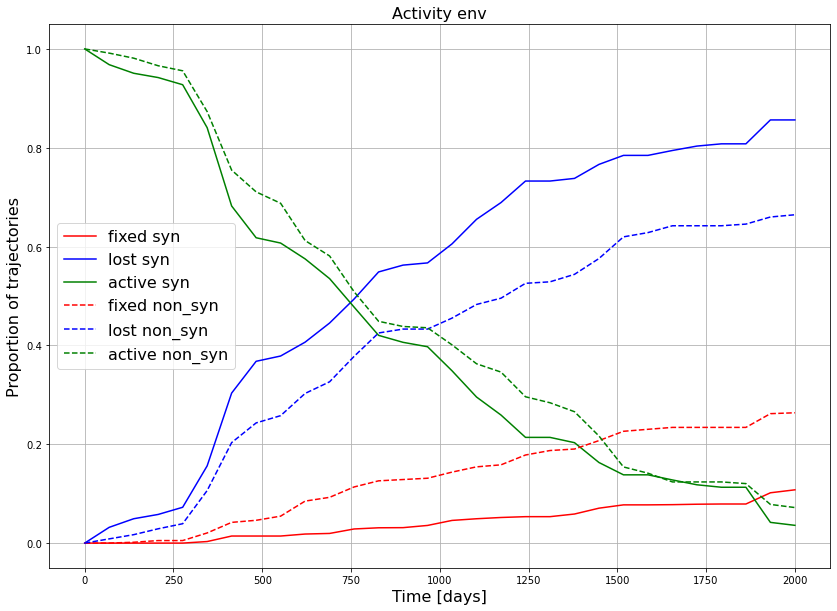

In [28]:
region = "env"
traj_type = "syn"
plot_average_activity(region, time_bins, activities, traj_type)

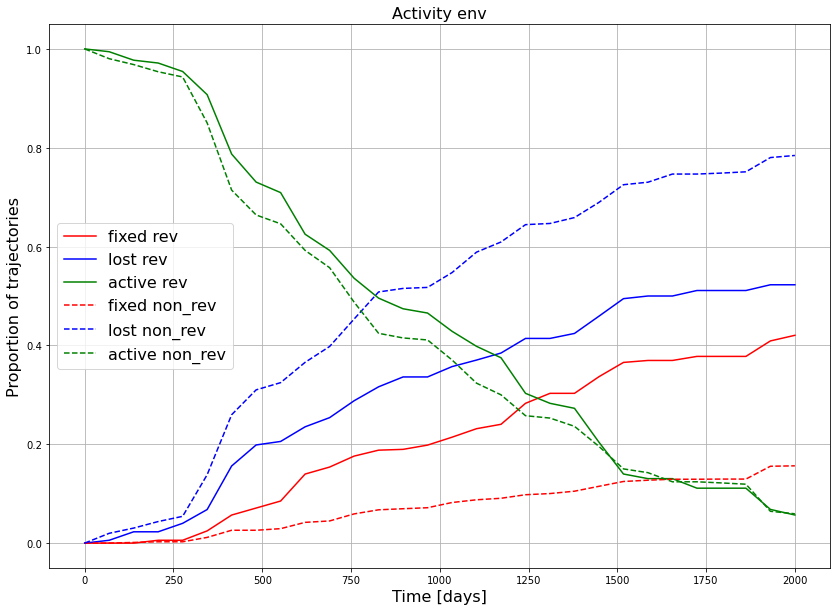

In [29]:
region = "env"
traj_type = "rev"
plot_average_activity(region, time_bins, activities, traj_type)

## Pol
### Syn / non_syn

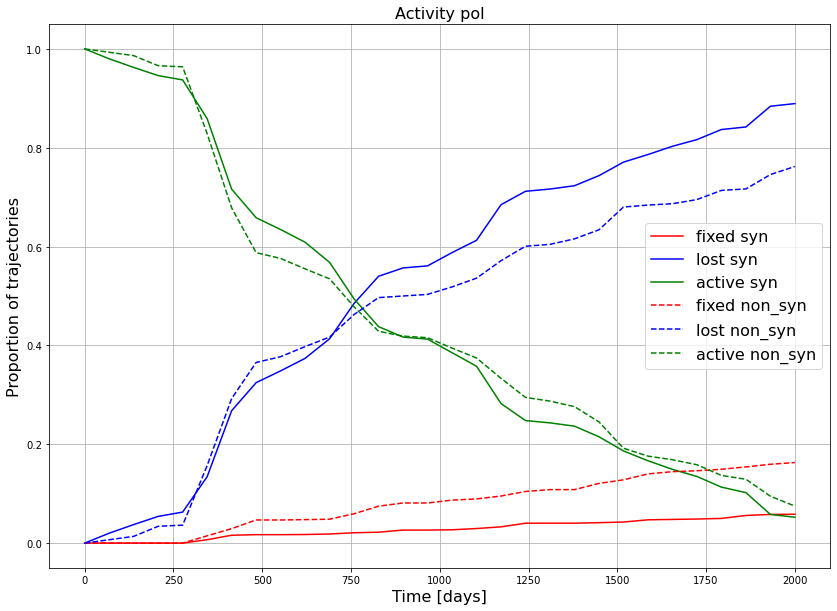

In [30]:
region = "pol"
traj_type = "syn"
plot_average_activity(region, time_bins, activities, traj_type)

### Rev / non_rev

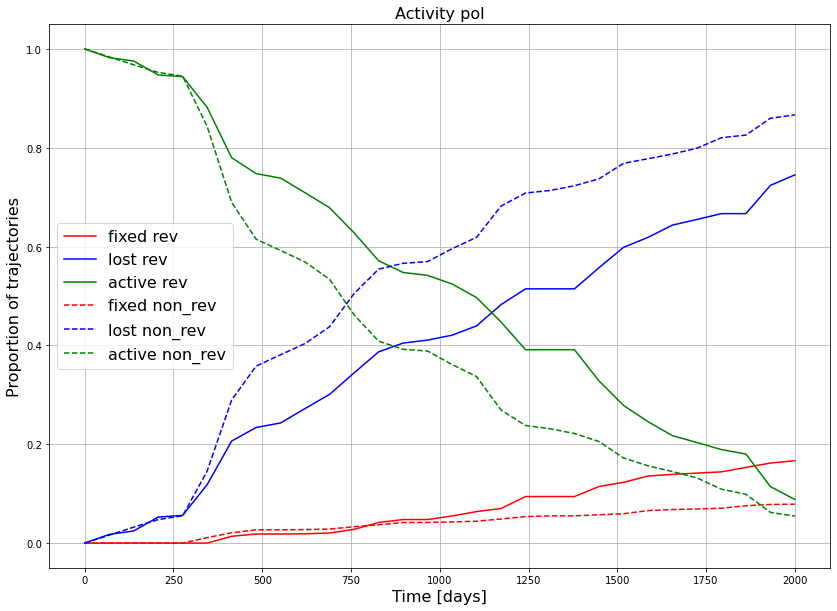

In [32]:
region = "pol"
traj_type = "rev"
plot_average_activity(region, time_bins, activities, traj_type)

## Gag
### Syn / non_syn

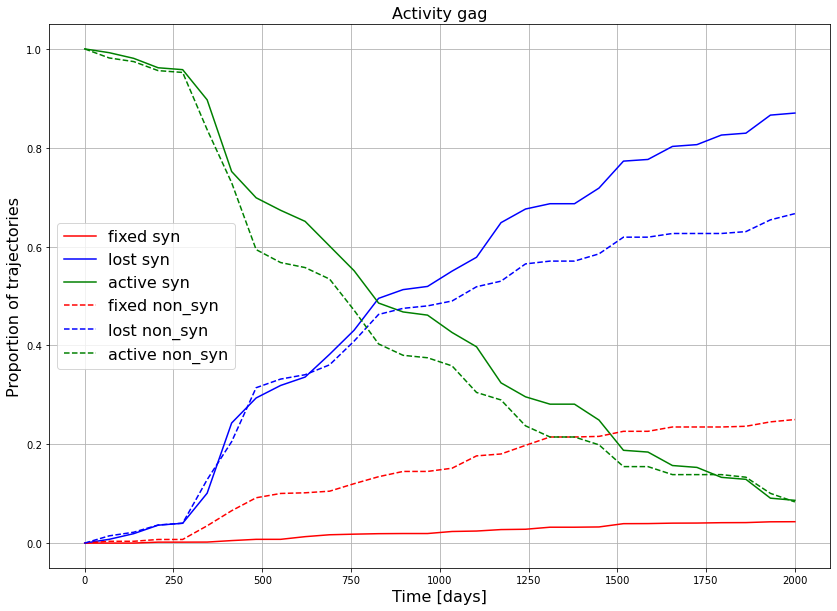

In [33]:
region = "gag"
traj_type = "syn"
plot_average_activity(region, time_bins, activities, traj_type)

### Rev / non_rev

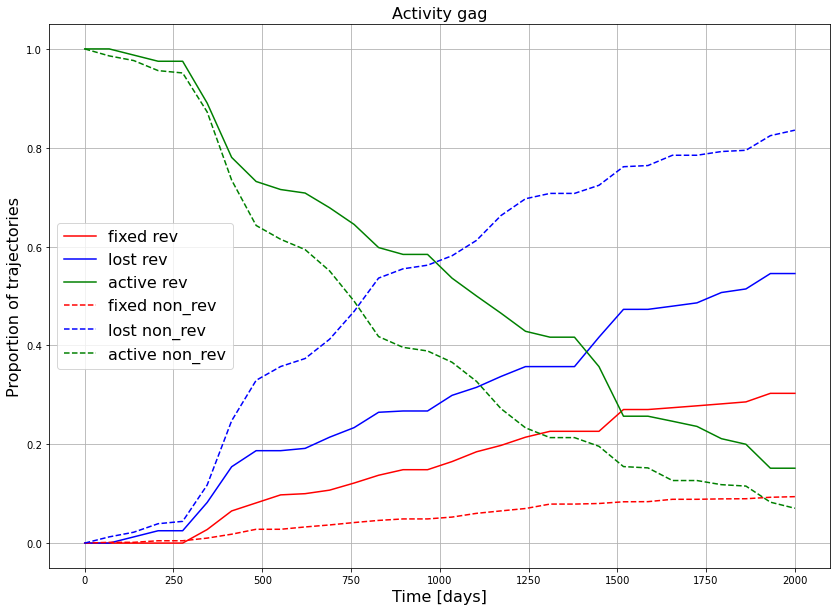

In [34]:
region = "gag"
traj_type = "rev"
plot_average_activity(region, time_bins, activities, traj_type)

# Comparison between regions

In [50]:
colors = ["r", "b", "g"]

def plot_average_activity2(regions, time_bins, activities, traj_type, activity_type, fontsize=16):
    plt.figure(figsize=(14,10))
    plt.title(f"Activity", fontsize=fontsize)
    for idx, region in enumerate(regions):
        plt.plot(time_bins, activities[region][traj_type][activity_type], '-', c=colors[idx], label=f"{region}-{traj_type}-{activity_type}")
        plt.plot(time_bins, activities[region]["non_"+traj_type][activity_type], '--', c=colors[idx], label=f"{region}-non_{traj_type}-{activity_type}")
    plt.legend(fontsize=fontsize)
    plt.xlabel("Time [days]", fontsize=fontsize)
    plt.ylabel("Proportion of trajectories", fontsize=fontsize)
    plt.grid()
    plt.show()

### Syn active

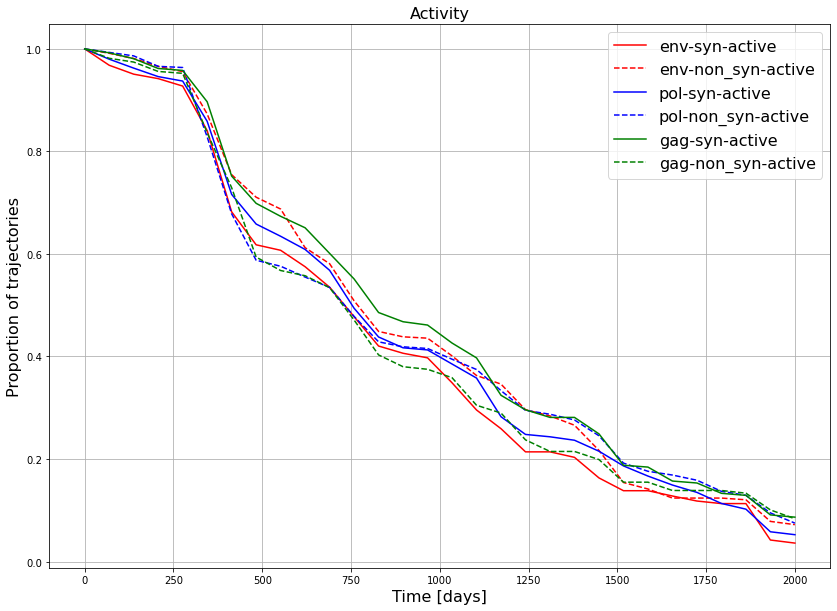

In [51]:
regions = ["env","pol","gag"]
traj_type = "syn"
activity_type = "active"
plot_average_activity2(regions, time_bins, activities, traj_type, activity_type)

### Rev active

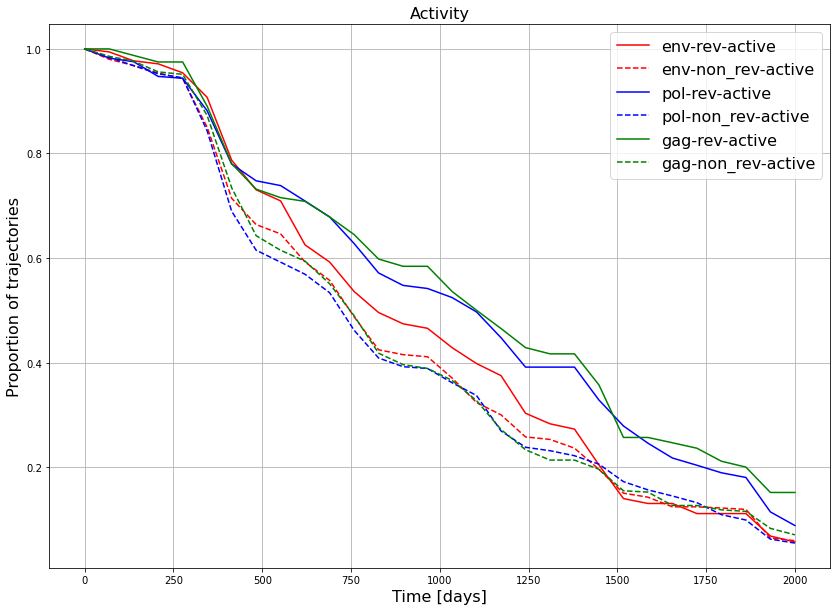

In [53]:
traj_type = "rev"
activity_type = "active"
plot_average_activity2(regions, time_bins, activities, traj_type, activity_type)

### Syn fixed

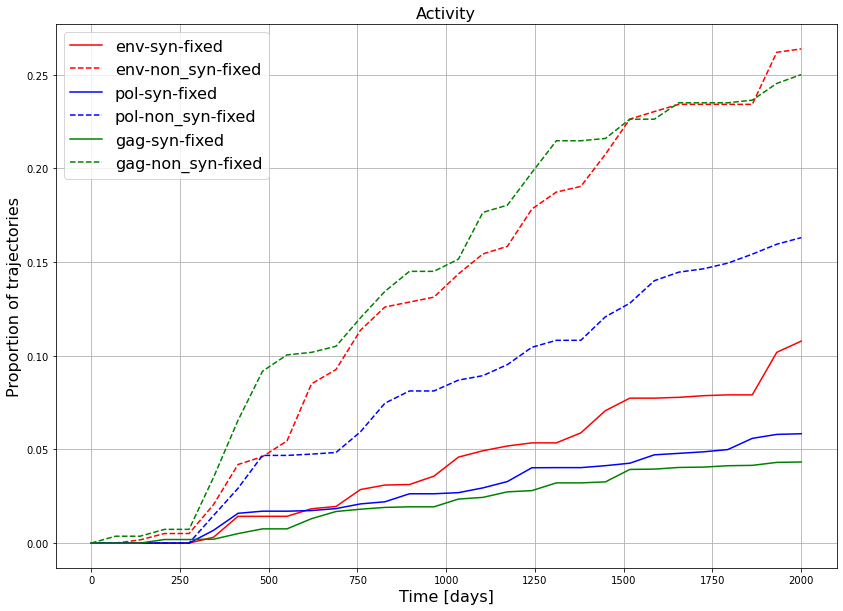

In [54]:
traj_type = "syn"
activity_type = "fixed"
plot_average_activity2(regions, time_bins, activities, traj_type, activity_type)

### Rev fixed

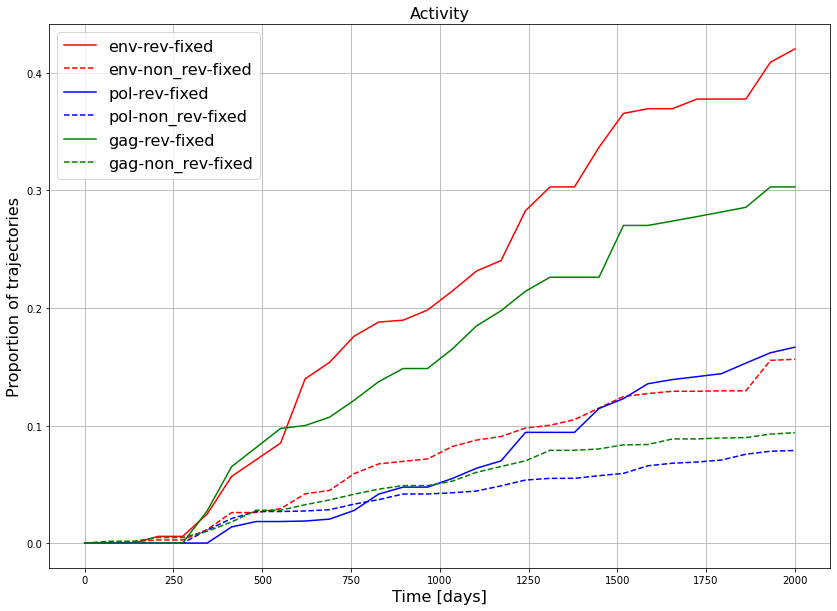

In [55]:
traj_type = "rev"
activity_type = "fixed"
plot_average_activity2(regions, time_bins, activities, traj_type, activity_type)

### Syn lost

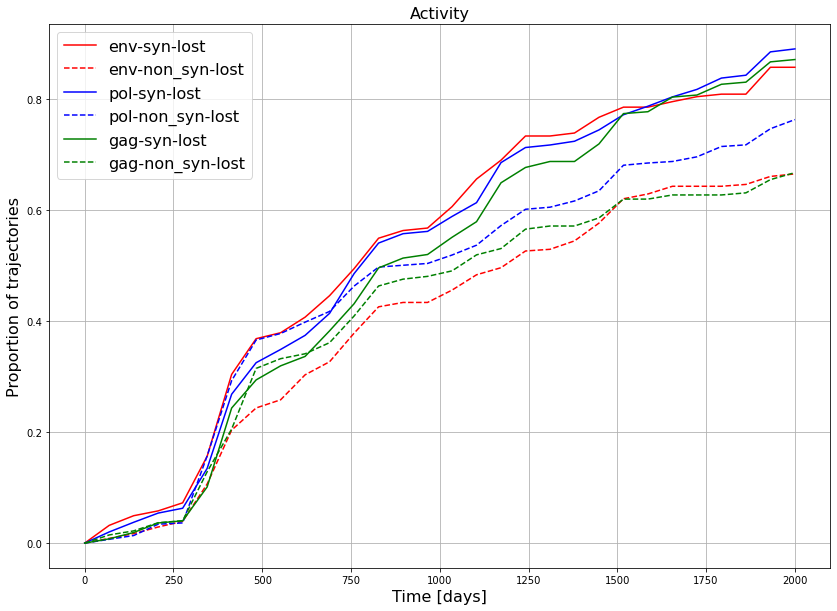

In [56]:
traj_type = "syn"
activity_type = "lost"
plot_average_activity2(regions, time_bins, activities, traj_type, activity_type)

### Rev lost

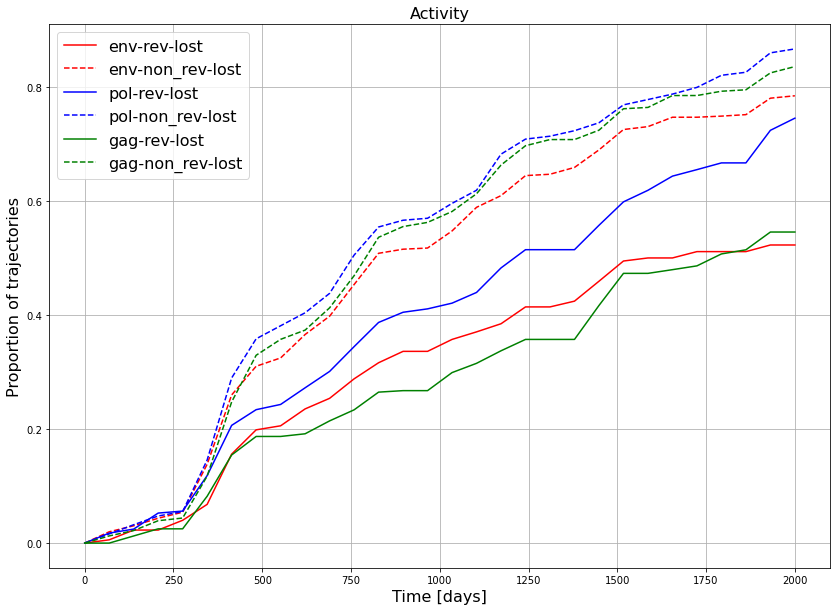

In [57]:
traj_type = "rev"
activity_type = "lost"
plot_average_activity2(regions, time_bins, activities, traj_type, activity_type)